# VAIBHAV PANDEY

## Data Cleaning And EDA Analysis

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Cleaned_HospInfo.csv")  # Replace with your file path if needed

# Step 1: Random imputation for missing values in 'hospital_overall_rating'
rating_col = 'hospital_overall_rating'

# Get non-null values for sampling
non_null_ratings = df[rating_col].dropna().values

# Identify indices with missing values
missing_rating_indices = df[df[rating_col].isnull()].index

# Randomly impute missing values
df.loc[missing_rating_indices, rating_col] = np.random.choice(non_null_ratings, size=len(missing_rating_indices))

# Step 2: Replace 'Not Available' with np.nan in categorical columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].replace("Not Available", np.nan)
    df[col] = df[col].fillna(method='ffill').fillna(method='bfill')

# Save the cleaned file
df.to_csv("Cleaned_HospInfo_Final.csv", index=False)
print("✅ Data cleaned and saved as 'Cleaned_HospInfo_Final.csv'")


✅ Data cleaned and saved as 'Cleaned_HospInfo_Final.csv'


C:\Users\Neel\AppData\Local\Temp\ipykernel_5216\101628457.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill').fillna(method='bfill')


In [2]:
df2  = pd.read_csv("Cleaned_HospInfo_Final.csv")

In [3]:
df2.head()

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,...,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,True,3.0,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,True,3.0,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,Same as the national average,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,True,4.0,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,True,5.0,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,True,3.0,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   provider_id                                           4654 non-null   int64  
 1   hospital_name                                         4654 non-null   object 
 2   address                                               4654 non-null   object 
 3   city                                                  4654 non-null   object 
 4   state                                                 4654 non-null   object 
 5   zip_code                                              4654 non-null   int64  
 6   county_name                                           4654 non-null   object 
 7   phone_number                                          4654 non-null   int64  
 8   hospital_type                                         4654

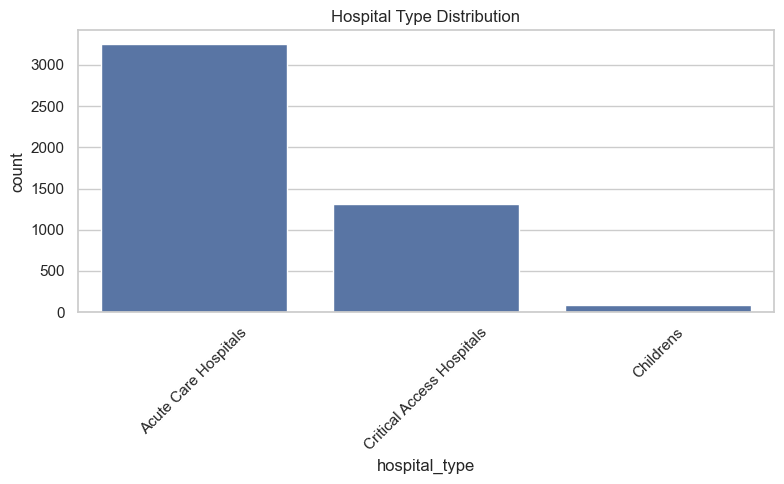

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Hospital Type Distribution

plt.figure(figsize=(8,5))
sns.countplot(data=df2, x='hospital_type', order=df['hospital_type'].value_counts().index)
plt.title("Hospital Type Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


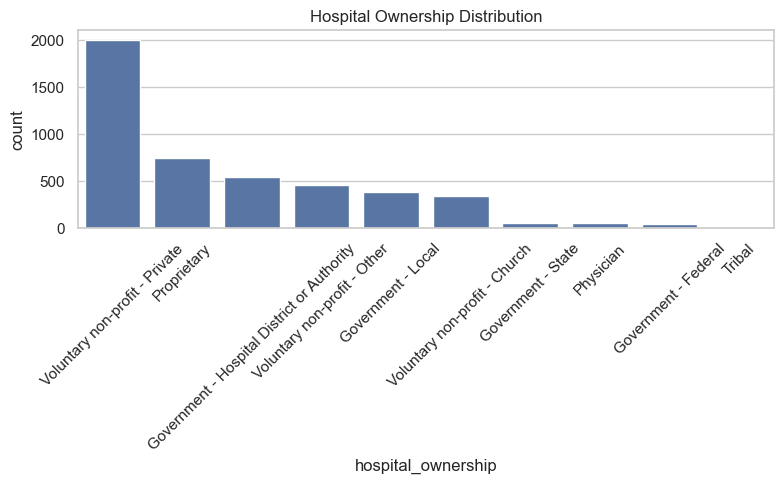

In [6]:
##2. Hospital Ownership Distribution

plt.figure(figsize=(8,5))
sns.countplot(data=df2, x='hospital_ownership', order=df['hospital_ownership'].value_counts().index)
plt.title("Hospital Ownership Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

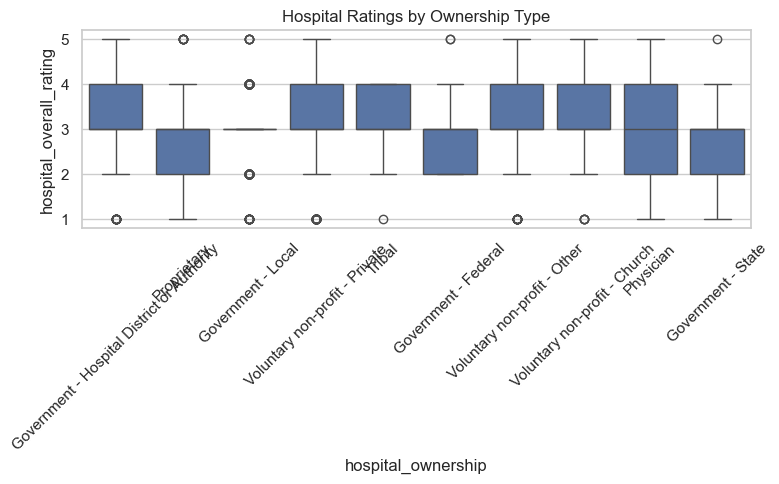

In [7]:
# 3. Ratings by Ownership

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='hospital_ownership', y='hospital_overall_rating')
plt.title("Hospital Ratings by Ownership Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


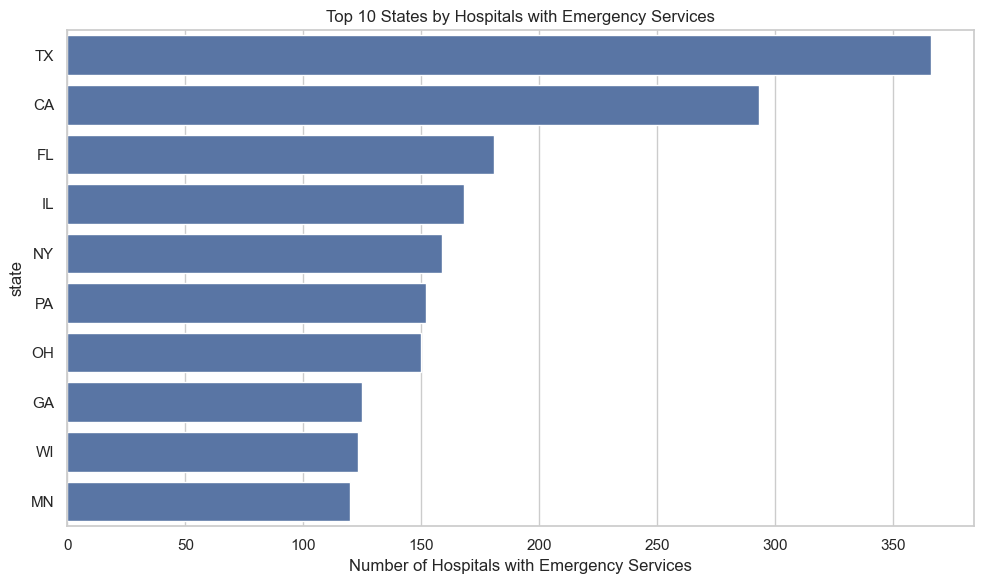

In [8]:
# 4. Emergency Services Availability by State (Top 10)

emergency_counts = df.groupby('state')['emergency_services'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=emergency_counts.values, y=emergency_counts.index)
plt.title("Top 10 States by Hospitals with Emergency Services")
plt.xlabel("Number of Hospitals with Emergency Services")
plt.tight_layout()
plt.show()

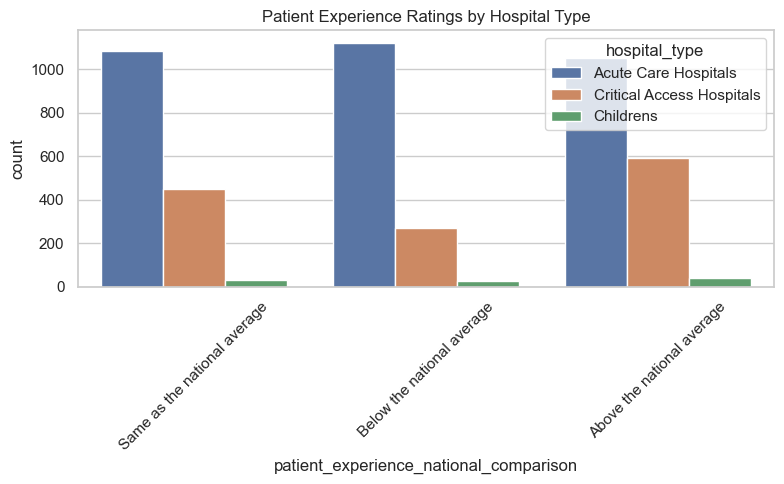

In [9]:
# 5. Patient Experience vs Hospital Type

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='patient_experience_national_comparison', hue='hospital_type')
plt.title("Patient Experience Ratings by Hospital Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


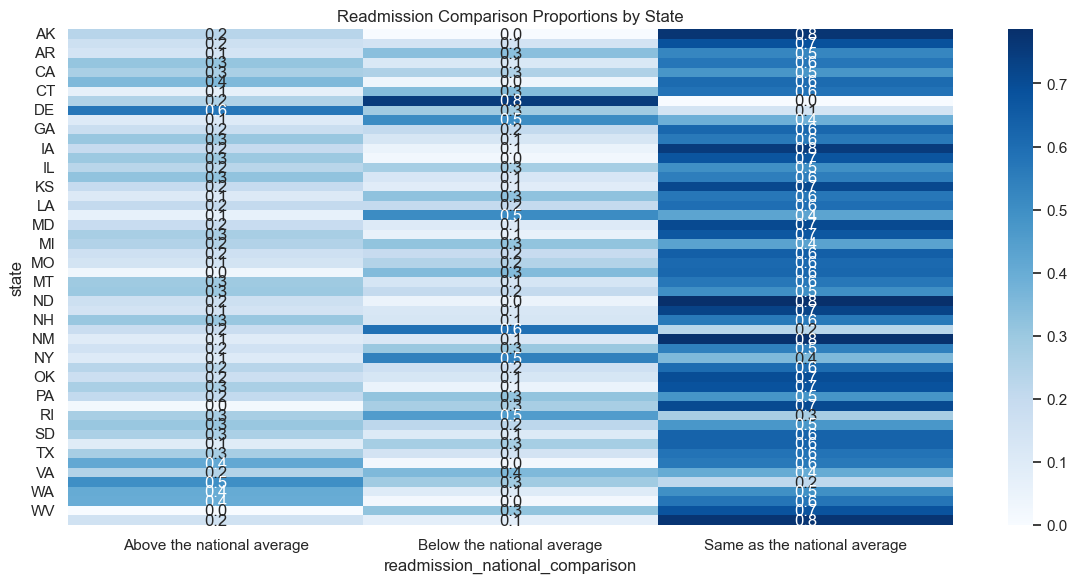

In [10]:
##6. Readmission Comparison by State (Heatmap)

readmission_summary = df.groupby('state')['readmission_national_comparison'].value_counts(normalize=True).unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(readmission_summary, cmap='Blues', annot=True, fmt=".1f")
plt.title("Readmission Comparison Proportions by State")
plt.tight_layout()
plt.show()


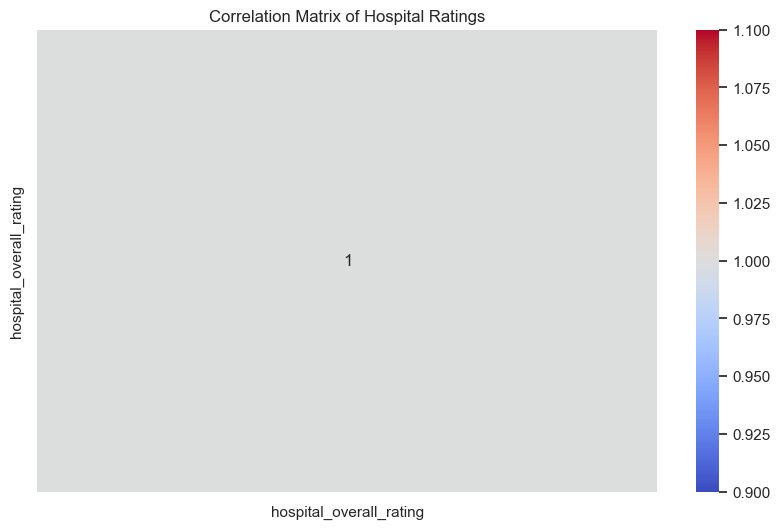

In [11]:
# 7. Correlation Matrix (Numeric Only)

numeric_df = df[['hospital_overall_rating']]
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Hospital Ratings")
plt.show()

# NILADRIBHUSHAN CHATURVEDI

## Statsitical Analysis

### Importing the libraries

In [12]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [13]:
df_cleaned = pd.read_csv('Cleaned_HospInfo_Final.csv')
df_cleaned.head()

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,...,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,True,3.0,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,True,3.0,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,Same as the national average,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,True,4.0,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,True,5.0,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,True,3.0,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


### Reverifying thre null values

In [14]:
df.isnull().sum()

provider_id                                             0
hospital_name                                           0
address                                                 0
city                                                    0
state                                                   0
zip_code                                                0
county_name                                             0
phone_number                                            0
hospital_type                                           0
hospital_ownership                                      0
emergency_services                                      0
meets_criteria_for_meaningful_use_of_ehrs               0
hospital_overall_rating                                 0
mortality_national_comparison                           0
safety_of_care_national_comparison                      0
readmission_national_comparison                         0
patient_experience_national_comparison                  0
effectiveness_

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   provider_id                                           4654 non-null   int64  
 1   hospital_name                                         4654 non-null   object 
 2   address                                               4654 non-null   object 
 3   city                                                  4654 non-null   object 
 4   state                                                 4654 non-null   object 
 5   zip_code                                              4654 non-null   int64  
 6   county_name                                           4654 non-null   object 
 7   phone_number                                          4654 non-null   int64  
 8   hospital_type                                         4654

### Statistical Analysis Question

#### Question 1: Is the average hospital rating significantly different from 3.0?

In [16]:
ratings = df['hospital_overall_rating']

µ = 3
n = 40
σ = np.std(ratings)
α = 0.05

# Taking random samples of 40
np.random.seed(100)
sample = ratings.sample(n=10)
x̄ = np.mean(sample)

print(f'Mean of Population (µ): {µ}')
print(f'Standard Deviation of Population (σ): {σ:.4f}')
print(f'Sample Mean (x̄): {x̄}')
print('-'*40)

# Null Hypothesis: µ = 3
# Alternate Hypothesis: µ ≠ 3

# So we will apply 1-Sample-T-Test

t_statistic, p_value = stats.ttest_1samp(sample, µ)
print(f'T Statistic: {t_statistic:.4f}')
print(f'P Value: {p_value:.4f}')
print(f'Critical Value: {α}')
print('-'*40)

if p_value <= α:
    print('Reject the null hypothesis.')
else:
    print('Failed to reject the null hypothesis.')
    print('Conclusion: So we can say that there is no significant difference between the population mean and the sample mean')

Mean of Population (µ): 3
Standard Deviation of Population (σ): 0.8140
Sample Mean (x̄): 3.2
----------------------------------------
T Statistic: 0.6882
P Value: 0.5086
Critical Value: 0.05
----------------------------------------
Failed to reject the null hypothesis.
Conclusion: So we can say that there is no significant difference between the population mean and the sample mean


#### Distribution Graph for both the curves (Sample and Population)

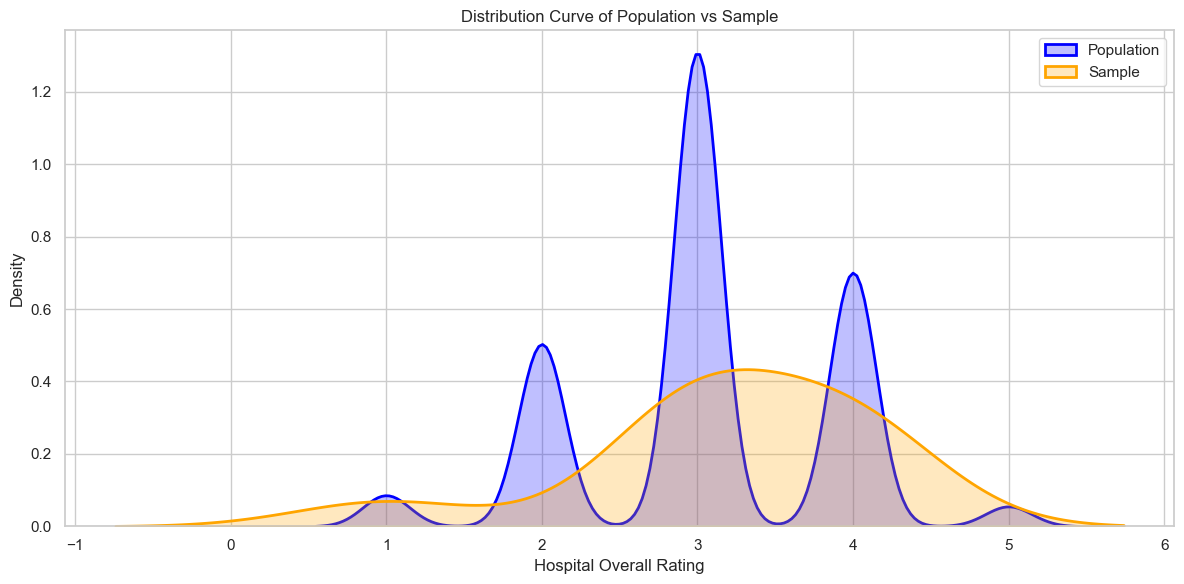

In [17]:
plt.figure(figsize=(12, 6))
sns.kdeplot(ratings, label='Population', fill=True, color='blue', linewidth=2)
sns.kdeplot(sample, label='Sample', fill=True, color='orange', linewidth=2)

plt.title('Distribution Curve of Population vs Sample')
plt.xlabel('Hospital Overall Rating')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Question 2: Is there a difference in hospital ratings between hospitals with and without emergency services?

In [18]:
with_services = df[df['emergency_services']==True]['hospital_overall_rating']
without_services = df[df['emergency_services']==False]['hospital_overall_rating']

# Taking Samples from both the groups
np.random.seed(42)
sample_1 = with_services.sample(n=10)
sample_2 = without_services.sample(n=10)

µ1 = np.mean(sample_1)
µ2 = np.mean(sample_2)
σ1 = np.std(sample_1)
σ2 = np.std(sample_2)
α = 0.05

# We have to perform 2-Sample-T-Test

# Null Hypothesis: µ1 = µ2
# Alternate Hypothesis: µ1 ≠ µ2

print(f'Mean of Sample 1 (µ1): {µ1:.4f}')
print(f'Mean of Sample 2 (µ2): {µ2:.4f}')
print(f'Standard Deviation of Sample 1 (σ1): {σ1:.4f}')
print(f'Standard Deviation of Sample 2 (σ2): {σ2:.4f}')
print('-'*50)

t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)
print(f'T Statistic: {t_statistic:.2f}')
print(f'P Value: {p_value:.2f}')
print(f'Critical Value: {α}')
print('-'*50)

if p_value <= α:
    print('Reject null hypothesis')
else:
    print('Failed to reject the null hypothesis.')
    print('Conclusion: So we can say that there is no significant difference between the Sample 1 and Sample 2')

Mean of Sample 1 (µ1): 3.1000
Mean of Sample 2 (µ2): 3.0000
Standard Deviation of Sample 1 (σ1): 0.9434
Standard Deviation of Sample 2 (σ2): 0.8944
--------------------------------------------------
T Statistic: 0.23
P Value: 0.82
Critical Value: 0.05
--------------------------------------------------
Failed to reject the null hypothesis.
Conclusion: So we can say that there is no significant difference between the Sample 1 and Sample 2


#### Distribution Graph for both the curves (Sample 1 and Sample 2)

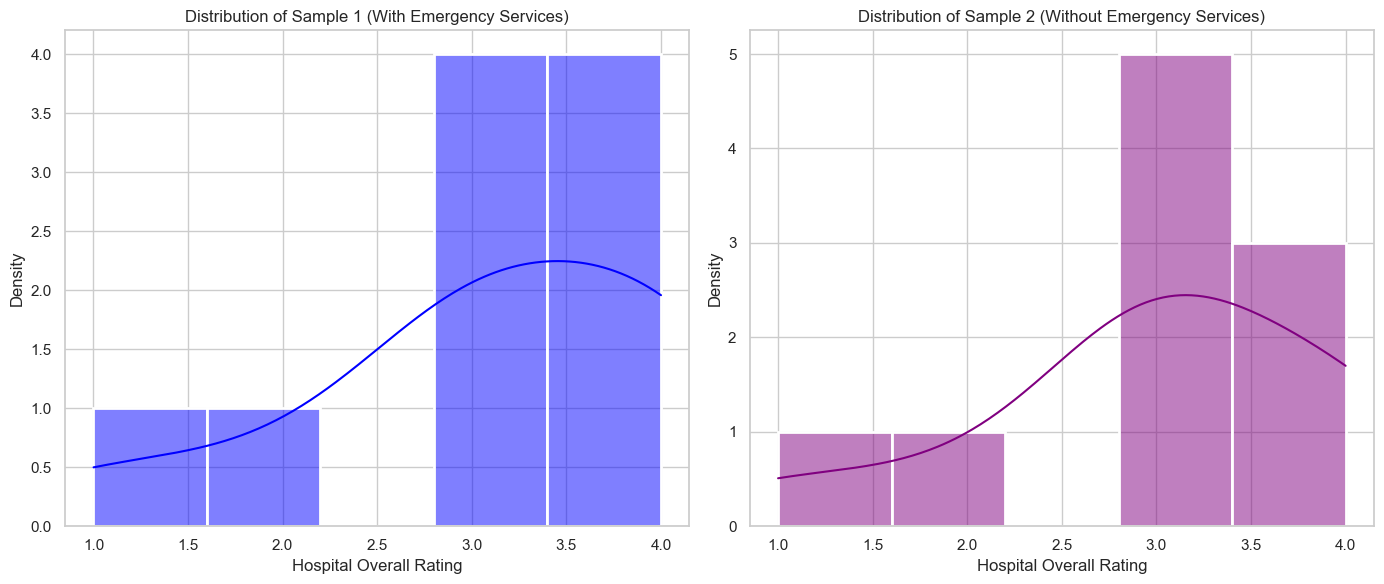

In [19]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(sample_1, color='blue', kde=True, linewidth=2)
plt.title('Distribution of Sample 1 (With Emergency Services)')
plt.xlabel('Hospital Overall Rating')
plt.ylabel('Density')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.histplot(sample_2, color='purple', kde=True, linewidth=2)
plt.title('Distribution of Sample 2 (Without Emergency Services)')
plt.xlabel('Hospital Overall Rating')
plt.ylabel('Density')
plt.grid(True)


plt.tight_layout()
plt.show()

#### Question 3:  Is there an association between emergency services and hospital ownership?

In [20]:
emergency_service = df['emergency_services']
hospital_ownership = df['hospital_ownership']
α = 0.05

contingency_table = pd.crosstab(emergency_service, hospital_ownership)
contingency_table

hospital_ownership,Government - Federal,Government - Hospital District or Authority,Government - Local,Government - State,Physician,Proprietary,Tribal,Voluntary non-profit - Church,Voluntary non-profit - Other,Voluntary non-profit - Private
emergency_services,,,,,,,,,,
False,8,12,15,4,24,72,1,15,20,86
True,34,532,377,56,31,681,8,326,436,1916


In [22]:
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f'Critical Value: {α}')
print('-'*50)

if p_val <= α:
    print("Reject the Null Hypothesis (H₀)")
    print("There is a significant association between emergency service and hospital ownership.")
else:
    print("Fail to Reject the Null Hypothesis (H₀)")
    print("There is NO significant association between emergency service and hospital ownership.")

Chi-Square Statistic: 213.46553236231395
p-value: 4.946373401097802e-41
Degrees of Freedom: 9
Critical Value: 0.05
--------------------------------------------------
Reject the Null Hypothesis (H₀)
There is a significant association between emergency service and hospital ownership.


#### Heatmap for better visualization

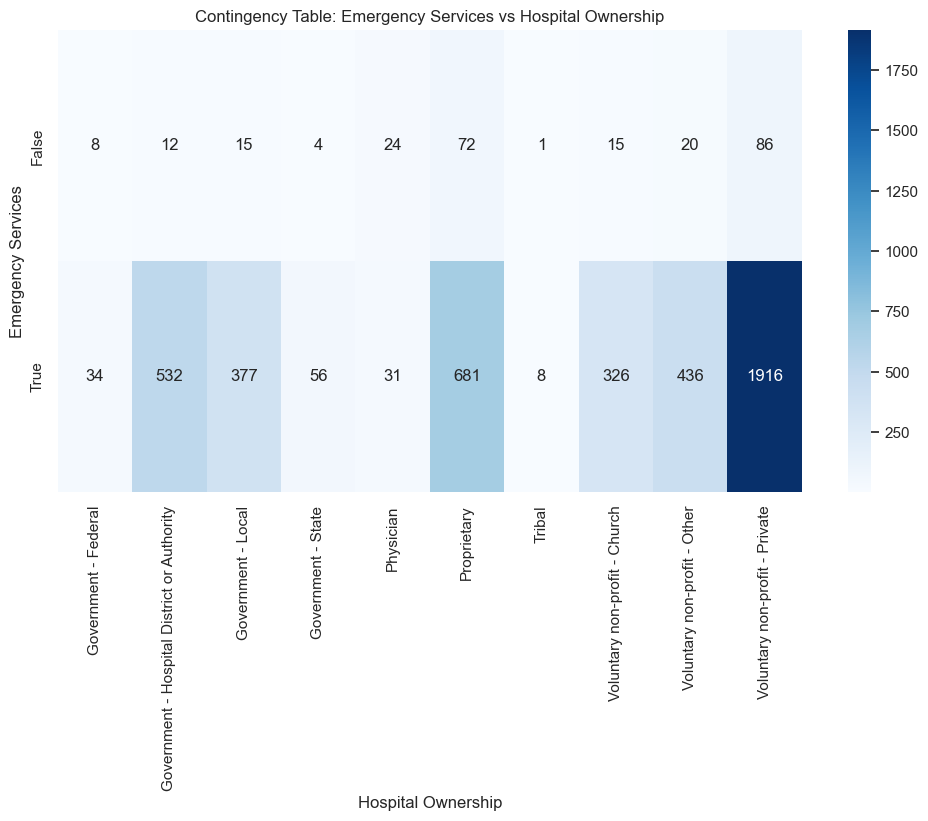

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table: Emergency Services vs Hospital Ownership')
plt.ylabel('Emergency Services')
plt.xlabel('Hospital Ownership')
plt.show()

#### Question 4: Do hospital ratings differ by hospital type?

In [38]:
# Null Hypothesis: There is no significant difference in hospital overall rating between different hospital types.
# Null Hypothesis: There is a significant difference for atleast one HospitaL Type.

α = 0.05

grouped = df.groupby('hospital_type')['hospital_overall_rating'].apply(list)
f_stat, p_value = stats.f_oneway(*grouped)
print(f'F Statistic: {f_stat:.4f}')
print(f'P Value: {p_value:.4f}')
print (f'Critical Value: {α}')
print('-'*40)

if p_value <= α:
    print('Reject null hypothesis.')
    print('Conclusion: There is a significant difference in atleast one hospital type.')
else:
    print('Failed to reject null hypothesis.')
    print('Conclusion: There is no significant difference in hospital overall rating between the different hospital types.')


F Statistic: 16.0498
P Value: 0.0000
Critical Value: 0.05
----------------------------------------
Reject null hypothesis.
Conclusion: There is a significant difference in atleast one hospital type.


#### Violin Plot for visualization purpose

C:\Users\Neel\AppData\Local\Temp\ipykernel_5216\3431286997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='hospital_type', y='hospital_overall_rating', palette='Set3', inner='box')


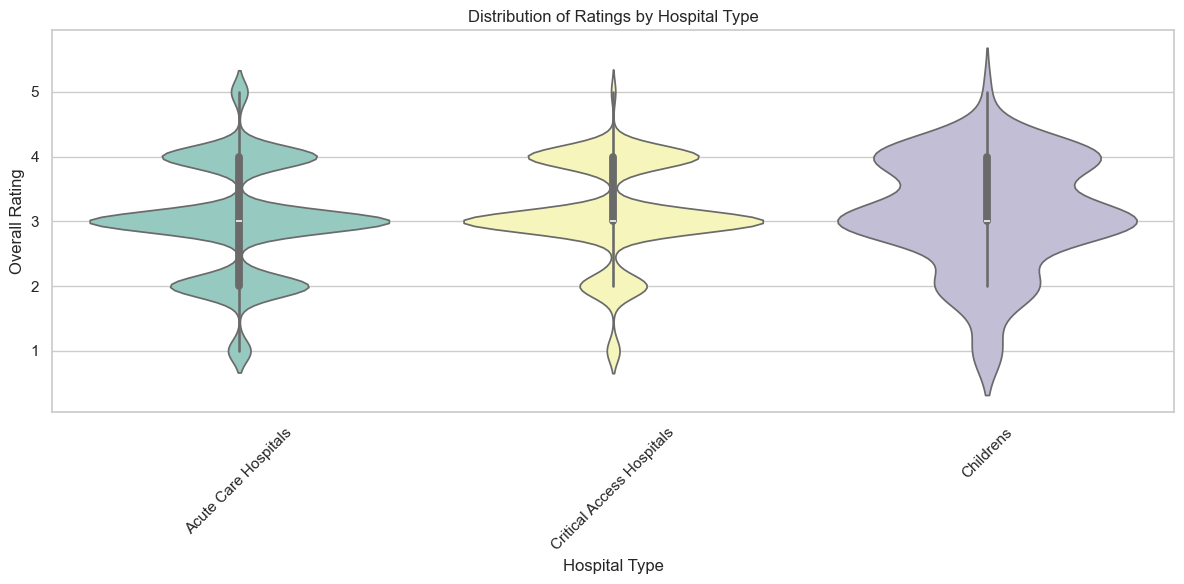

In [39]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='hospital_type', y='hospital_overall_rating', palette='Set3', inner='box')
plt.title('Distribution of Ratings by Hospital Type')
plt.xlabel('Hospital Type')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()